In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler


In [ ]:
import pandas as pd

def read_csv_to_df(filepath):
    """
    Reads a CSV file from the specified filepath and returns a pandas DataFrame.

    Parameters:
        filepath (str): The path to the CSV file to be read.

    Returns:
        pandas.DataFrame: The DataFrame containing the data from the CSV file.
    """
    df = pd.read_csv(filepath, skiprows=4)
    return df


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'DBSCAN clustering (2001-2021)')

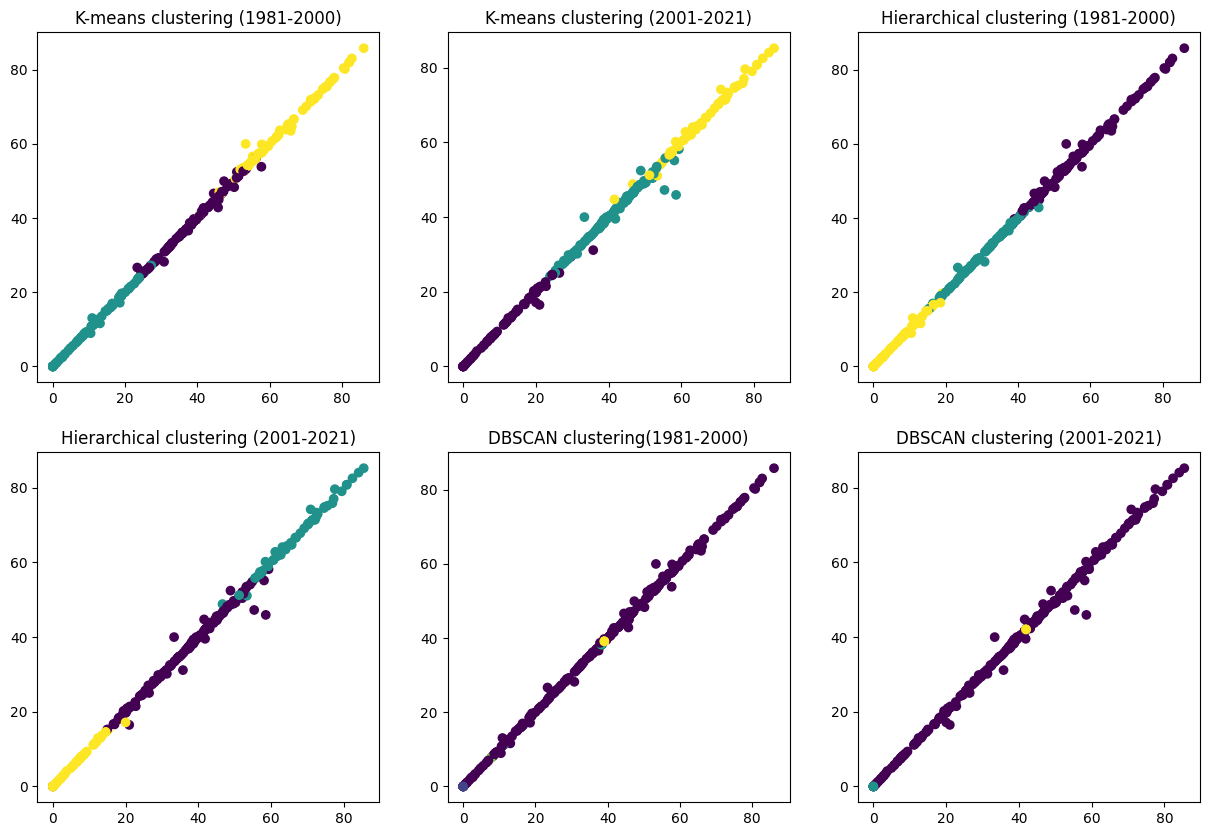

In [ ]:

# Load the dataset
data = read_csv_to_df("API_AG.LND.AGRI.ZS_DS2_en_csv_v2_5447782.csv")
data_inverse=data.transpose()
# Subset the data for the years 1965-1995 and 1996-2020
data_81_00 = data.loc[:, "1981":"2000"]
data_01_21 = data.loc[:, "2001":"2021"]

data_81_00 = data_81_00.fillna(0)
data_01_21 = data_01_21.fillna(0)

# Convert the dataframe to a numpy array
scaled_data_81_00 = data_81_00.values
scaled_data_01_21= data_01_21.values
# K-means clustering
kmeans_81_00 = KMeans(n_clusters=3, random_state=0).fit(scaled_data_81_00)
kmeans_01_21 = KMeans(n_clusters=3, random_state=0).fit(scaled_data_01_21)

# Hierarchical clustering
hierarchical_81_00 = AgglomerativeClustering(n_clusters=3).fit(scaled_data_81_00)
hierarchical_01_21 = AgglomerativeClustering(n_clusters=3).fit(scaled_data_01_21)

# DBSCAN clustering
dbscan_81_00 = DBSCAN(eps=1, min_samples=3).fit(scaled_data_81_00)
dbscan_01_21 = DBSCAN(eps=1, min_samples=3).fit(scaled_data_01_21)

# Visualize the results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# K-means clustering plots
axs[0, 0].scatter(data_81_00.iloc[:, 0], data_81_00.iloc[:, 1], c=kmeans_81_00.labels_)
axs[0, 0].set_title("K-means clustering (1981-2000)")
axs[0, 1].scatter(data_01_21.iloc[:, 0], data_01_21.iloc[:, 1], c=kmeans_01_21.labels_)
axs[0, 1].set_title("K-means clustering (2001-2021)")

# Hierarchical clustering plots
axs[0, 2].scatter(data_81_00.iloc[:, 0], data_81_00.iloc[:, 1], c=hierarchical_81_00.labels_)
axs[0, 2].set_title("Hierarchical clustering (1981-2000)")
axs[1, 0].scatter(data_01_21.iloc[:, 0], data_01_21.iloc[:, 1], c=hierarchical_01_21.labels_)
axs[1, 0].set_title("Hierarchical clustering (2001-2021)")

# DBSCAN clustering plots
axs[1, 1].scatter(data_81_00.iloc[:, 0], data_81_00.iloc[:, 1], c=dbscan_81_00.labels_)
axs[1, 1].set_title("DBSCAN clustering(1981-2000)")
axs[1, 2].scatter(data_01_21.iloc[:, 0], data_01_21.iloc[:, 1], c=dbscan_01_21.labels_)
axs[1, 2].set_title("DBSCAN clustering (2001-2021)")

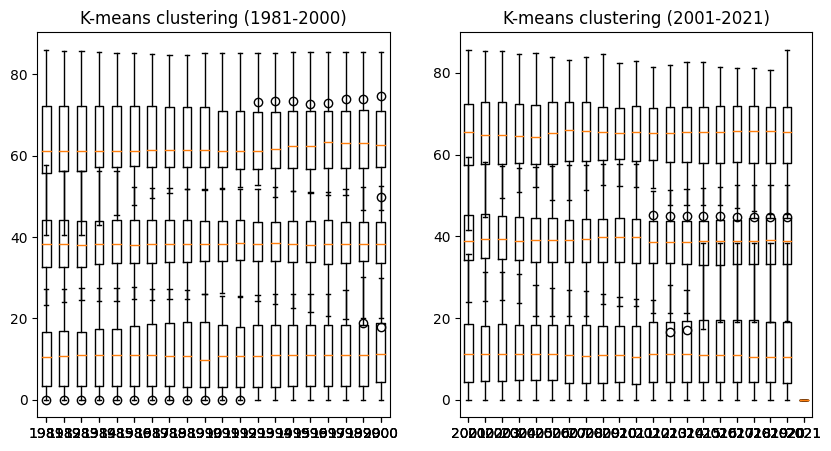

In [ ]:
# K-means clustering boxplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i in range(len(np.unique(kmeans_81_00.labels_))):
    axs[0].boxplot(data_81_00.iloc[kmeans_81_00.labels_==i, :].values, labels=data_81_00.columns)
    axs[0].set_title("K-means clustering (1981-2000)")

for i in range(len(np.unique(kmeans_01_21.labels_))):
    axs[1].boxplot(data_01_21.iloc[kmeans_01_21.labels_==i, :].values, labels=data_01_21.columns)
    axs[1].set_title("K-means clustering (2001-2021)")


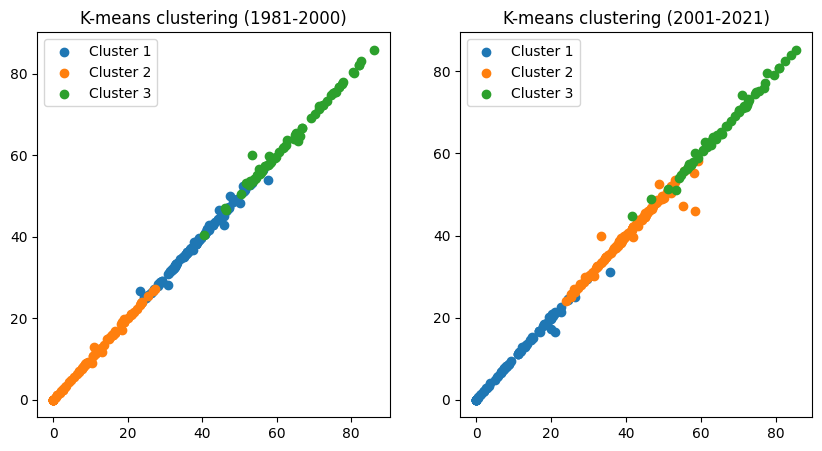

In [ ]:
# K-means clustering scatterplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i in range(len(np.unique(kmeans_81_00.labels_))):
    axs[0].scatter(data_81_00.iloc[kmeans_81_00.labels_==i, 0], data_81_00.iloc[kmeans_81_00.labels_==i, 1], label="Cluster "+str(i+1))
    axs[0].set_title("K-means clustering (1981-2000)")
    axs[0].legend()

for i in range(len(np.unique(kmeans_01_21.labels_))):
    axs[1].scatter(data_01_21.iloc[kmeans_01_21.labels_==i, 0], data_01_21.iloc[kmeans_01_21.labels_==i, 1], label="Cluster "+str(i+1))
    axs[1].set_title("K-means clustering (2001-2021)")
    axs[1].legend()


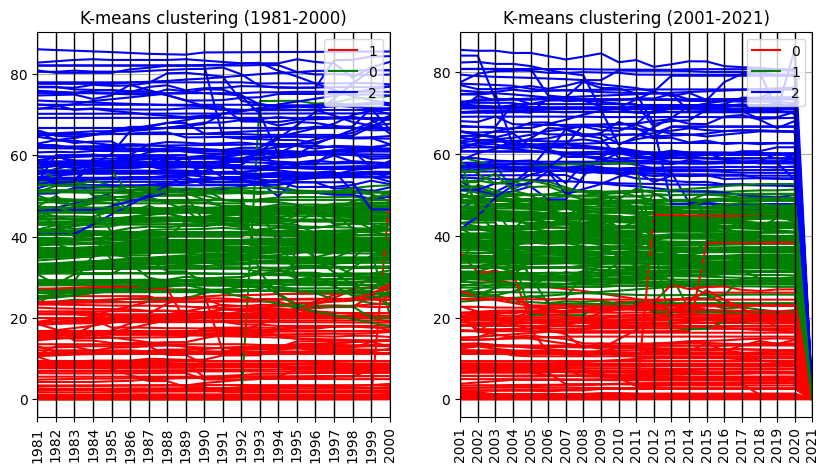

In [ ]:
# K-means clustering parallel coordinate plots
from pandas.plotting import parallel_coordinates

data_81_00_kmeans = data_81_00.copy()
data_81_00_kmeans["Cluster"] = kmeans_81_00.labels_

data_01_21_kmeans = data_01_21.copy()
data_01_21_kmeans["Cluster"] = kmeans_01_21.labels_

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

parallel_coordinates(data_81_00_kmeans, "Cluster", color=["r", "g", "b"], ax=axs[0])
axs[0].set_title("K-means clustering (1981-2000)")
axs[0].tick_params(axis='x', rotation=90)

parallel_coordinates(data_01_21_kmeans, "Cluster", color=["r", "g", "b"], ax=axs[1])
axs[1].set_title("K-means clustering (2001-2021)")
axs[1].tick_params(axis='x', rotation=90)


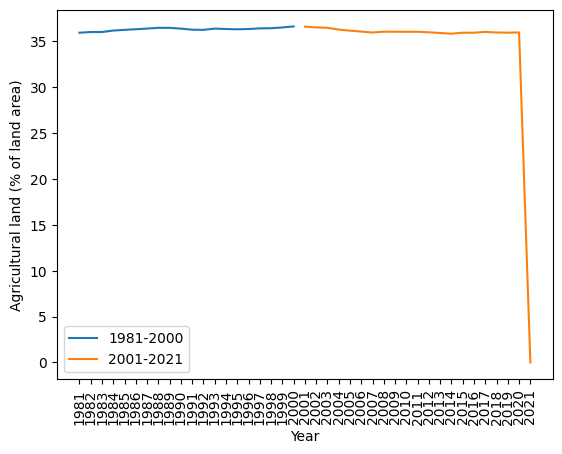

In [ ]:

# Plot the data
plt.plot(data_81_00.mean(axis=0), label="1981-2000")
plt.plot(data_01_21.mean(axis=0), label="2001-2021")
plt.legend()
plt.xlabel("Year")
plt.tick_params(axis='x', rotation=90)
plt.ylabel("Agricultural land (% of land area)")
plt.show()

In [ ]:

def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p, s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper   


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load data from World Bank dataset
df = pd.read_csv('API_AG.LND.AGRI.ZS_DS2_en_csv_v2_5447782.csv', skiprows=4)
df = df.drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 66'], axis=1)
df = df.set_index('Country Name')

# Get data for a specific country
country = 'United States'
data = df.loc[country, '1981':'2020'].values.astype(np.float64)

# Define the exponential growth function
def exp_growth(x, a, b, c):
    """
    This function defines an exponential growth function with three parameters: a, b, and c. The function takes an input x and returns the value of the function at that point using the formula a * exp(b * x) + c.

    Parameters:

        x (float or numpy array): The input value(s) at which to evaluate the function.
        a (float): The amplitude of the function.
        b (float): The rate of exponential growth.
        c (float): The constant offset of the function.

    Returns:

        The value of the exponential growth function at the input value(s) x.

    """
    return a * np.exp(b * x) + c

# Fit the exponential growth model to the data
x = np.arange(len(data))
params, cov = curve_fit(exp_growth, x, data,maxfev=5000)
a, b, c = params

# Calculate upper and lower limits of confidence range
sigmas = np.linspace(0.1, 1.0, 10)
lower, upper = err_ranges(x, exp_growth, params, sigmas)

# Plot the data and best fitting function with confidence range
plt.plot(x, data, 'o', label='Data')
plt.plot(x, exp_growth(x, a, b, c), label='Fit')
plt.fill_between(x, lower, upper, alpha=0.5, label='Confidence Range')
plt.xlabel('Year')
plt.ylabel('% of Agricultural Land')
plt.title(f'Exponential Growth Fit to {country}')
plt.legend()
plt.show()


IndentationError: ignored